## Practical Work 2
# **Prepaied by Dr. Hatem el-attar **

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

# **Step_1 :** Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Step_2:** To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
 <b>yi = a*xi + b (and a = -2, b = 1)</b>


In [29]:
x=np.random.uniform(low=0, high=20, size=150)
y=-2*x+1


Step_3: plot x and y

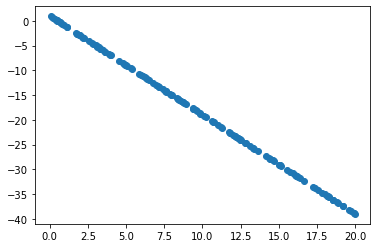

In [30]:
plt.plot(x,y,'o')

#### **Step_4:** Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [258]:
def batchGD(x,y,alpha,iteration):
    theta0,theta1=0,0
    m=len(x)
    thetas=[]
    losses=[]
    hypothesis=[]
    for i in range(iteration):
        thetas.append([theta0,theta1])
        h=theta0+theta1*x
        hypothesis.append(h)
        loss=sum((h-y)**2)/m
        losses.append(loss)
        grad0=sum((h-y))/m
        grad1=(x.T@(h-y))/m
        theta0=theta0-alpha*grad0
        theta1=theta1-alpha*grad1
    
    return thetas,losses,hypothesis,theta0,theta1
        

#### **Step_5:** Try your function with any input parameters of your choice.

In [259]:
thetas,losses,hypothesis,theta0,theta1=batchGD(x,y,0.001,100)
thetas=np.array(thetas)
hypothesis=np.array(hypothesis)




#### **Step_6:** Calculate r2 score


In [260]:
y_hat=theta0+theta1*x
y_mean=np.mean(y)
ss_res=sum((y-y_hat)**2)
ss_tot=sum((y-y_mean)**2)
r2=1-(ss_res/ss_tot)
r2

0.9974778001340655

#### **Step_7:** Plot loss vs. epochs

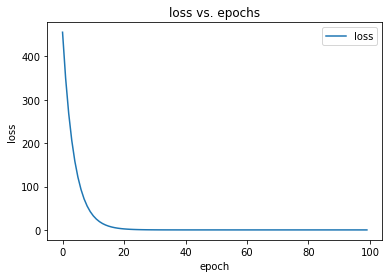

In [72]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title('loss vs. epochs')
plt.plot(losses,label='loss')
plt.legend()

#### **Step_8:** Plot Theta_0 vs. loss and Theta_1 vs. loss

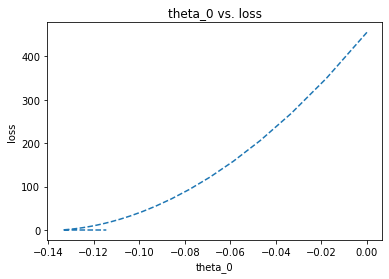

In [64]:
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.title('theta_0 vs. loss')
plt.plot(thetas[:,0],losses,'--')

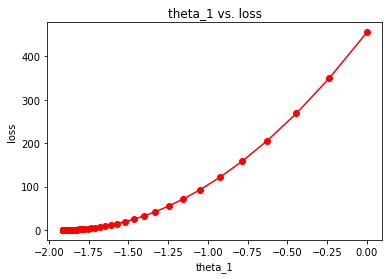

In [70]:
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.title('theta_1 vs. loss')
plt.plot(thetas[:,1],losses,'r-o')

#### **Step_9:** Plot all regression lines till converge

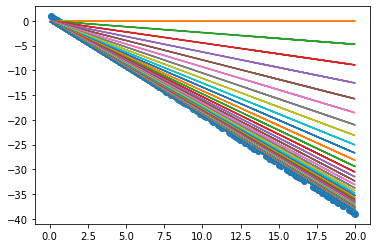

In [96]:
plt.plot(x,y,'o')
plt.plot(x,hypothesis.T) #x with every column from h make one line
plt.show()

#### **[Step_10:](https://)** Plot the best regression line

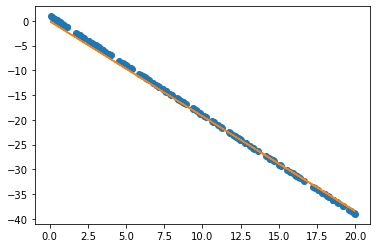

In [133]:
plt.plot(x,y,'o')
plt.plot(x,hypothesis[-1])
plt.show()

#### **Step_11:** Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [155]:
thetas,losses,hypothesis,theta0,theta1=singleLR(x,y,0.01,1000)
thetas=np.array(thetas)
hypothesis=np.array(hypothesis)
losses=np.array(losses)



In [136]:
y_hat=theta0+theta1*x
y_mean=np.mean(y)
ss_res=sum((y-y_hat)**2)
ss_tot=sum((y-y_mean)**2)
r2=1-(ss_res/ss_tot)
r2

0.9999907824834829

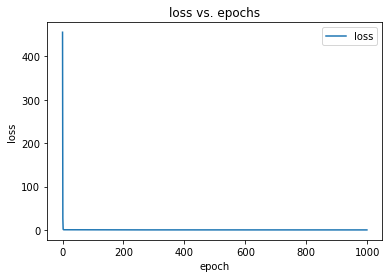

In [137]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title('loss vs. epochs')
plt.plot(losses,label='loss')
plt.legend()

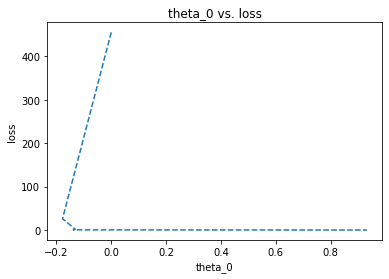

In [138]:
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.title('theta_0 vs. loss')
plt.plot(thetas[:,0],losses,'--')

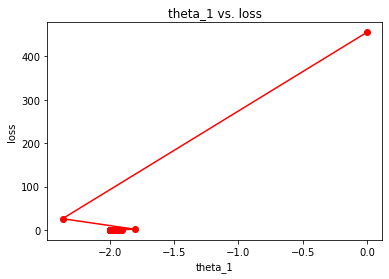

In [139]:
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.title('theta_1 vs. loss')
plt.plot(thetas[:,1],losses,'r-o')

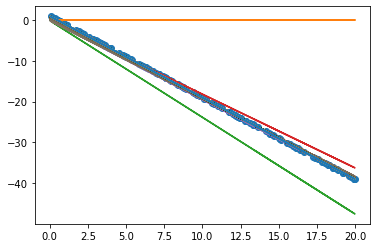

In [140]:
plt.plot(x,y,'o')
plt.plot(x,hypothesis.T) #x with every column from h make one line
plt.show()

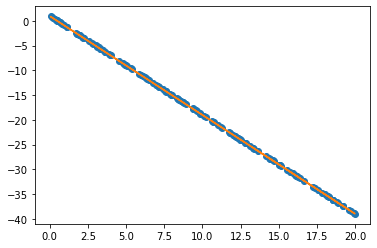

In [156]:
plt.plot(x,y,'o')
plt.plot(x,hypothesis[-1])
plt.show()

#### **Step_12:** Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [216]:
def miniBatchGD(x,y,alpha,iteration,batchSize):
    m=len(x)
    size=m//batchSize
    remainder=m%batchSize
    theta0,theta1=0,0
    thetas=[]
    losses=[]
    hypothesis=[]
    xForBatch=[]
    for _ in range(iteration):
        htemp=np.array([])
        for i in range(batchSize):
            start=i*size
            end=(i+1)*size if i<batchSize-1 else ((i+1)*size)+remainder
            thetas.append([theta0,theta1])
            h=theta0+theta1*x[start:end]
            loss=sum((h-y[start:end])**2)/(end-start)
            losses.append(loss)
            grad0=sum((h-y[start:end]))/(end-start)
            grad1=(x[start:end].T@(h-y[start:end]))/(end-start)
            theta0=theta0-alpha*grad0
            theta1=theta1-alpha*grad1
            htemp=np.concatenate((htemp,h))
        hypothesis.append(htemp)
    return thetas,losses,hypothesis,theta0,theta1

In [217]:
thetas,losses,hypothesis,theta0,theta1=miniBatchGD(x,y,0.01,100,16)
thetas=np.array(thetas)
hypothesis=np.array(hypothesis)
losses=np.array(losses)


In [218]:
y_hat=theta0+theta1*x
y_mean=np.mean(y)
ss_res=sum((y-y_hat)**2)
ss_tot=sum((y-y_mean)**2)
r2=1-(ss_res/ss_tot)
r2

0.9999996306915286

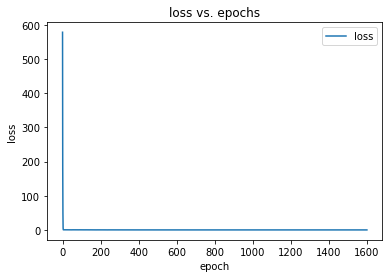

In [219]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title('loss vs. epochs')
plt.plot(losses,label='loss')
plt.legend()

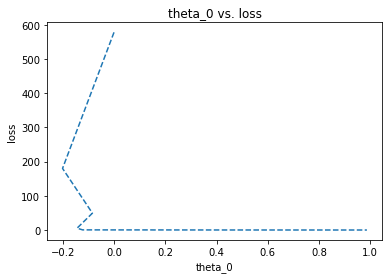

In [220]:
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.title('theta_0 vs. loss')
plt.plot(thetas[:,0],losses,'--')

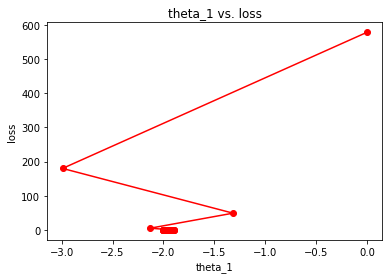

In [221]:
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.title('theta_1 vs. loss')
plt.plot(thetas[:,1],losses,'r-o')

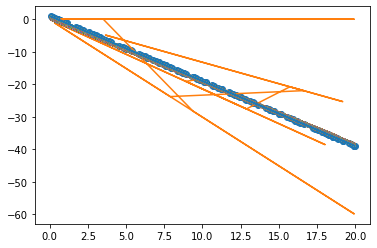

In [222]:
plt.plot(x,y,'o')
plt.plot(x,hypothesis.T) #x with every column from h make one line
plt.show()

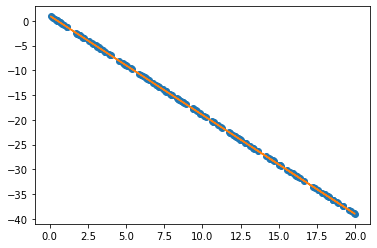

In [223]:
plt.plot(x,y,'o')
plt.plot(x,hypothesis[-1])
plt.show()

## Stochastic GD

#### **Step_13**: Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [235]:
def stochasticGD(x,y,alpha,iteration):
    m=len(x)
    theta0,theta1=0,0
    thetas=[]
    losses=[]
    hypothesis=[]
    for _ in range(iteration):
        for i in range(m):
            thetas.append([theta0,theta1])
            h=theta0+theta1*x[i]
            hypothesis.append(h)
            loss=(h-y[i])**2
            losses.append(loss)
            grad0=h-y[i]
            grad1=(h-y[i])*x[i]
            theta0=theta0-alpha*grad0
            theta1=theta1-alpha*grad1
            
    return thetas,losses,hypothesis,theta0,theta1

In [233]:
l=np.array([1,2,3])
np.tile(l,9)

array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1,
       2, 3, 1, 2, 3])

In [3]:
help(np.tile)

Help on function tile in module numpy:

tile(A, reps)
    Construct an array by repeating A the number of times given by reps.
    
    If `reps` has length ``d``, the result will have dimension of
    ``max(d, A.ndim)``.
    
    If ``A.ndim < d``, `A` is promoted to be d-dimensional by prepending new
    axes. So a shape (3,) array is promoted to (1, 3) for 2-D replication,
    or shape (1, 1, 3) for 3-D replication. If this is not the desired
    behavior, promote `A` to d-dimensions manually before calling this
    function.
    
    If ``A.ndim > d``, `reps` is promoted to `A`.ndim by pre-pending 1's to it.
    Thus for an `A` of shape (2, 3, 4, 5), a `reps` of (2, 2) is treated as
    (1, 1, 2, 2).
    
    Note : Although tile may be used for broadcasting, it is strongly
    recommended to use numpy's broadcasting operations and functions.
    
    Parameters
    ----------
    A : array_like
        The input array.
    reps : array_like
        The number of repetitions of `A`

In [236]:
iteration=100
alpha=0.01
thetas,losses,hypothesis,theta0,theta1=stochasticGD(x,y,alpha,iteration)
thetas=np.array(thetas)
hypothesis=np.array(hypothesis)
losses=np.array(losses)
x_repeated=np.tile(x,iteration)

In [237]:
y_hat=theta0+theta1*x
y_mean=np.mean(y)
ss_res=sum((y-y_hat)**2)
ss_tot=sum((y-y_mean)**2)
r2=1-(ss_res/ss_tot)
r2

1.0

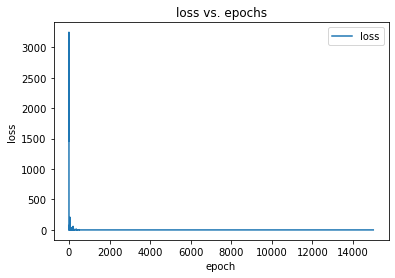

In [238]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title('loss vs. epochs')
plt.plot(losses,label='loss')
plt.legend()

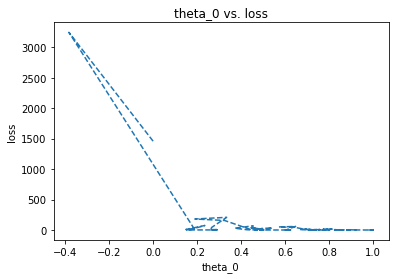

In [239]:
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.title('theta_0 vs. loss')
plt.plot(thetas[:,0],losses,'--')

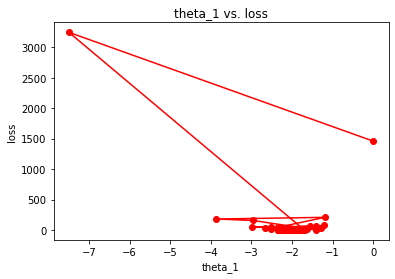

In [240]:
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.title('theta_1 vs. loss')
plt.plot(thetas[:,1],losses,'r-o')

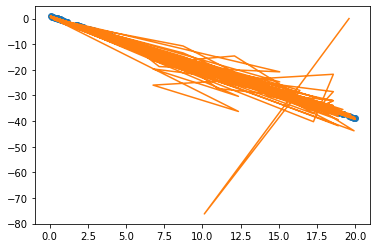

In [244]:
plt.plot(x,y,'o')
plt.plot(x_repeated,hypothesis) 
plt.show()

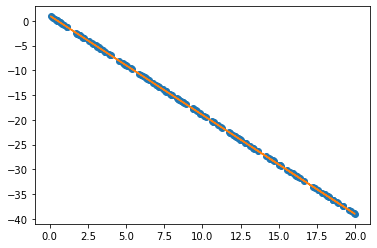

In [246]:
plt.plot(x,y,'o')
plt.plot(x,hypothesis[-150:])
plt.show()

In [251]:
iteration=100
alpha=0.001
thetas,losses,hypothesis,theta0,theta1=stochasticGD(x,y,alpha,iteration)
thetas=np.array(thetas)
hypothesis=np.array(hypothesis)
losses=np.array(losses)
x_repeated=np.tile(x,iteration)

In [252]:
y_hat=theta0+theta1*x
y_mean=np.mean(y)
ss_res=sum((y-y_hat)**2)
ss_tot=sum((y-y_mean)**2)
r2=1-(ss_res/ss_tot)
r2

0.9999994741498397

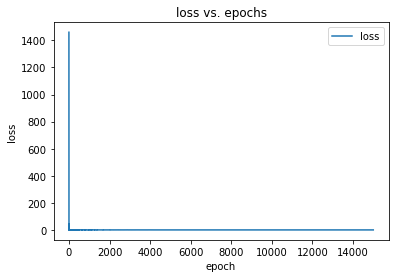

In [253]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title('loss vs. epochs')
plt.plot(losses,label='loss')
plt.legend()

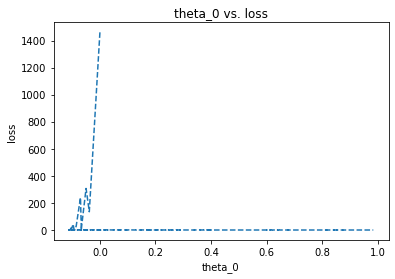

In [254]:
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.title('theta_0 vs. loss')
plt.plot(thetas[:,0],losses,'--')

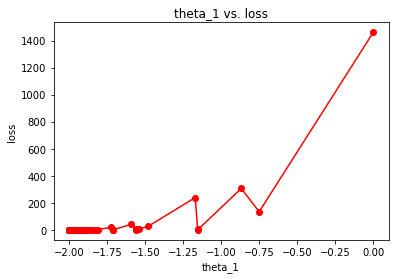

In [255]:
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.title('theta_1 vs. loss')
plt.plot(thetas[:,1],losses,'r-o')

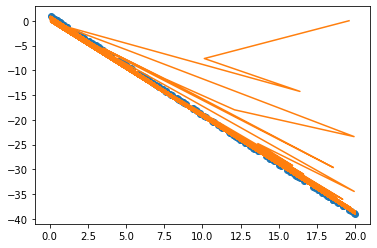

In [256]:
plt.plot(x,y,'o')
plt.plot(x_repeated,hypothesis) 
plt.show()

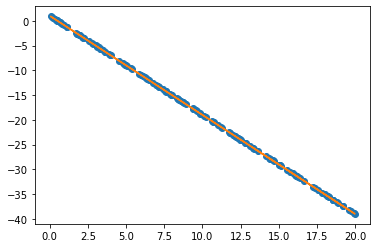

In [257]:
plt.plot(x,y,'o')
plt.plot(x,hypothesis[-150:])
plt.show()